Analytical solution for diffraction (Rayleigh–Sommerfeld):
![Integral](Rayleigh–Sommerfeld.png)

Impulse response:
![Integral](Impulse.png)

Convolution:
![Integral](conv.png)

interpretation of convolution:
![Integral](conv2.png)

Fresnel approximation:
![Integral](fresnel1.png)

Fresnel integral:
![Integral](fresnel2.png)

Fresnel impulse:
![Integral](fresnel3.png)

Fresnel propogation:
![Integral](fresnel4.png)

Fraunhofer propogation:
![Integral](Fraunhofer1.png)

In [3]:
#Importing required libraries
import numpy as np
import random
from decimal import Decimal, ROUND_DOWN
import cmath

%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
#Physical properties
wavelength = 813.4e-9   
focal_dist = 4e-3       #focal length of the lens
beam_width = 1.8e-3       #radius of the input beam
aperture = 4e-3         #aperture diameter of the lens


#Simulation variables
xmin = -50e-3   # Simulating 100X100 mm^2 grid
xmax = 50e-3
ymin = -50e-3
ymax = 50e-3
xlen = xmax-xmin  #calculating total length, later used to find dx
ylen = ymax-ymin


N = 4000      #X-Size of the matrix for performing simulation
M = 4000      #Y-Size of the matrix for performing simulation

dx = xlen/N   #X-Sampling size
dy = ylen/M   #Y-Sampling size

print(dx,dy)

x = np.arange(xmin,xmax,dx)   #X-line_space
y = np.arange(ymin,ymax,dy)   #Y-line_space


X,Y = np.meshgrid(x,y)   #defining meshgrid


def circ(x):    #Circ function for simulating aperture
    return  (abs(x)<=1/2).astype(np.int)


2.5e-05 2.5e-05


Defining a gaussian beam:
    The multiplied factor is to normalize the beam with 1mW power (this factor depends on beam width)

In [53]:
normalizing_factor = (1e-3/((np.pi*beam_width**2)/2))   #normalzing to 1mW power
input_beam = normalizing_factor*np.exp(-2*((X/beam_width)**2 + (Y/(beam_width))**2))  #Intensity

In [54]:
inp_power = np.trapz(np.trapz(input_beam))*dx*dy  #1mW power (Integration of Intensity)
print('Input power = ' + str(1e3*inp_power) + ' mW')

Input power = 1.0000000000002205 mW


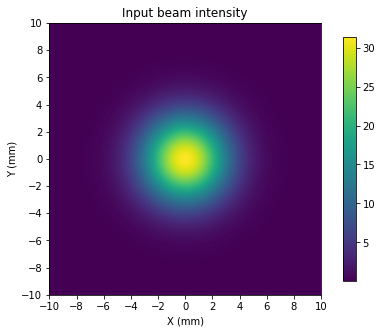

In [55]:
slicing = 1600
extent = [(xmin + slicing*dx)*1e3, (xmax - slicing*dx)*1e3,(ymin + slicing*dy)*1e3,(ymax - slicing*dy)*1e3]
plt.figure(figsize=(8,5))
plt.title('Input beam intensity')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.xticks(np.arange(-10,11,2))
plt.yticks(np.arange(-10,11,2))
plt.imshow((input_beam)[slicing:N-slicing,slicing:M-slicing],extent = extent)
plt.colorbar(shrink=0.9)

Cordinates transformation:
![Integral](fraunhofer2.png)

Fraunhofer function for propagation of beam:

In [56]:
def fraunhofer(inp,xlen,ylen,wavelen,z):
    M,N = inp.shape

    dx = xlen/N    #finding sampling size
    dy = ylen/M
    
    k = 2*np.pi/wavelen  #wave-vector

    LX = wavelen*z/dx    #Calculating image plane X-Len 
    LY = wavelen*z/dy    #Calculating image plane Y-Len

    DX = wavelen*z/xlen  #Calculating image plane X-Sampling
    DY = wavelen*z/ylen  #Calculating image plane Y-Sampling
    
    x2 = np.arange(-LX/2,LX/2-(DX/2),DX)
    y2 = np.arange(-LY/2,LY/2-(DY/2),DY)
    
    X2,Y2 = np.meshgrid(x2,y2)  #meshgrid for image plane

    exp_term = 1/(1j*wavelen*z)
    
    outp = exp_term*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(inp)))*dx*dy

    
    #print('X & Y side lengths = ' + str(LX) +' ' + str(LY))
    #print('X & Y sampling size = ' + str(DX) +' ' + str(DY))
    
    return outp,LX,LY,DX,DY,x2,y2

Focusing beam:
We use the amplitude (not intensity) for propagation that's why input_beam**0.5

In [57]:
focused_beam,LX,LY,DX,DY,x2,y2 = fraunhofer((input_beam**0.5),xlen,ylen,wavelength,focal_dist)

Plotting focused beam characteristics:

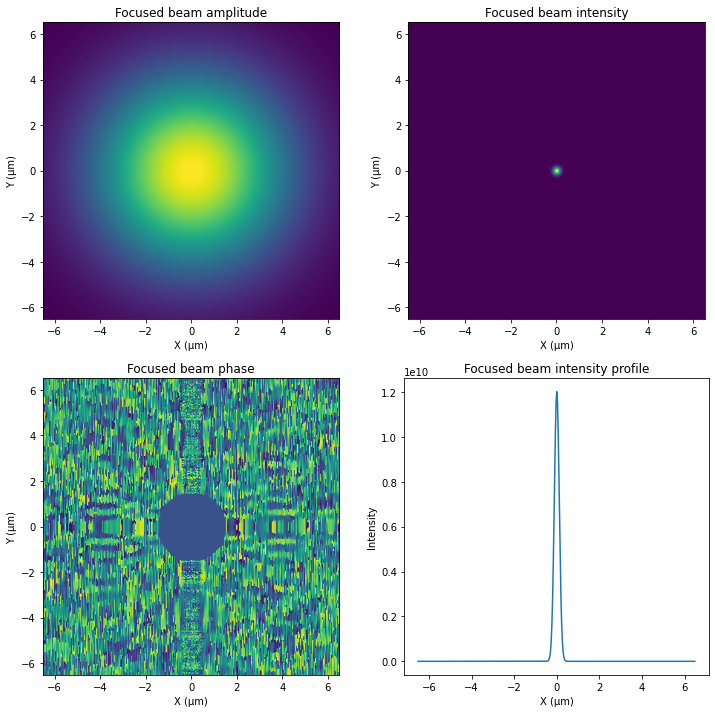

In [58]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][0].set_title('Focused beam amplitude')
ax[0][0].set_xlabel('X (\u03bcm)')
ax[0][0].set_ylabel('Y (\u03bcm)')
ax[0][0].set_xticks(np.arange(-10,11,2))
ax[0][0].set_yticks(np.arange(-10,11,2))
ax[0][0].imshow(input_beam[slicing:N-slicing,slicing:M-slicing],extent = extent)


slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][1].set_title('Focused beam intensity')
ax[0][1].set_xlabel('X (\u03bcm)')
ax[0][1].set_ylabel('Y (\u03bcm)')
ax[0][1].set_xticks(np.arange(-10,11,2))
ax[0][1].set_yticks(np.arange(-10,11,2))
ax[0][1].imshow(abs(focused_beam*focused_beam)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][0].set_title('Focused beam phase')
ax[1][0].set_xlabel('X (\u03bcm)')
ax[1][0].set_ylabel('Y (\u03bcm)')
ax[1][0].set_xticks(np.arange(-10,11,2))
ax[1][0].set_yticks(np.arange(-10,11,2))
ax[1][0].imshow(np.angle(focused_beam)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][1].set_title('Focused beam intensity profile')
ax[1][1].set_xlabel('X (\u03bcm)')
ax[1][1].set_ylabel('Intensity')
ax[1][1].set_xticks(np.arange(-10,11,2))
ax[1][1].plot(1e6*x2[slicing:N-slicing],abs(focused_beam*focused_beam)[int(N/2)][slicing:N-slicing])

plt.show()

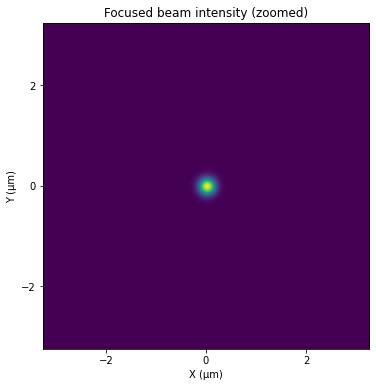

In [59]:
fig, ax = plt.subplots(1,figsize=(6, 6))

slicing = 1900
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax.set_title('Focused beam intensity (zoomed)')
ax.set_xlabel('X (\u03bcm)')
ax.set_ylabel('Y (\u03bcm)')
ax.set_xticks(np.arange(-10,11,2))
ax.set_yticks(np.arange(-10,11,2))
ax.imshow(abs(focused_beam*focused_beam)[slicing:N-slicing,slicing:M-slicing],extent = extent)


Fuction to get the beam radius:

In [60]:
print(np.max(abs(focused_beam*focused_beam)))

12019228095.981123


In [61]:
#This works for only one peak
def get_radius(inp,DX,DY):
    M,N = inp.shape
    rad_intensity = abs(inp*inp).max()/np.exp(2)   #peak/e^2
    #print(rad_intensity)
    ret = np.where(abs(inp*inp)>=rad_intensity)   #finding the region where intensity>=peak/e^2
    return ( ((ret[0][-1]-M/2)*DY)**2 + ((ret[1][-1]-N/2)*DX)**2 )**0.5   #returning the maximum possible distance

From the theoretical formula the focused beam radius should ~0.52um (radius is calculated w.r.t. Intensity)

In [62]:
ideal_radius = get_radius(focused_beam,DX,DY)
print('Radius of the focused spot = ' + str(1e6*ideal_radius) + ' \u03bcm')

Radius of the focused spot = 0.23006426232685512 μm


Fresnel Impulse response Popagation Kernel:

In [63]:
def Propagation(inp,xlen,ylen,wavelen,z):

    M,N = inp.shape

    dx = xlen/N  #calculating x-sampling
    dy = ylen/M  #calculating y-sampling
    
    k = 2*np.pi/wavelen  #wave-vector
    
    fx = np.arange(-1/(2*dx),1/(2*dx)-1/(2*xlen),1/xlen)   #fourier domain X-cordinates
    fy = np.arange(-1/(2*dy),1/(2*dy)-1/(2*ylen),1/ylen)   #fourier domain Y-cordinates

    FX,FY = np. meshgrid(fx,fy)   #meshgrid for fourier domain
    
    H = np.exp(-1j*np.pi*wavelen*z*(FX**2 + FY**2))   #Impulse response 
    
    H = np.fft.fftshift(H)
    
    U1 = np.fft.fft2(np.fft.fftshift(inp))     #Fourier transform of the input beam
    U2 = H*U1                                  #multiplication in fourier domain (convolution)
    outp = np.fft.ifftshift(np.fft.ifft2(U2))  #Coming back to spatial domain by taking IFT
    
    
    return outp

In [64]:
z = np.arange(-10e-6,10.01e-6,1e-7)   #Propagation distance -10um to 10um
len(z)  

201

Iteratively calculate X-Y profile at each Z frame (for focused beam) and extract the X=0 profile to plot X-Z profile:

Note that we are propagating using the amplitude (This might take time):

In [65]:
#Since most values around the spot is zero, we can ignore them, and propogate only the central focused spot according to our requirement
#here we propagate only the central region i.e. 2000x2000 cut-out slice
propz = []
z_radius = np.zeros(len(z))
for i in range(len(z)):
    prop = (Propagation(focuseds_beam[1000:3000,1000:3000],LX/2,LY/2,wavelength,z[i]))  #Propagation kernel on each z frame
    z_radius[i] = get_radius(prop,DX,DY) #Extracting radius at a particular Z frame
    propz.append(abs(prop[int(len(prop)/2)])) #Appending X=0 slice 

propzi = np.transpose(propz)  #transpose for plotting convenience 

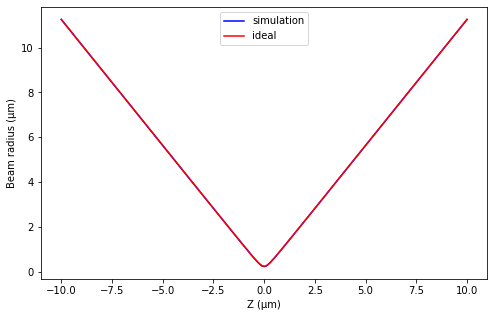

In [66]:
zR = np.pi*get_radius(focused_beam,DX,DY)**2/wavelength   #calculating zR using analytical formula
plt.figure(figsize=(8,5))
plt.plot(1e6*z,1e6*z_radius,color='blue',label='simulation')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('Beam radius (\u03bcm)')
plt.plot(1e6*z,1e6*get_radius(focused_beam,DX,DY)*(1+(z/zR)**2)**0.5,color='red',label='ideal')  #Analytical beam radius
plt.legend(loc = 'upper center')

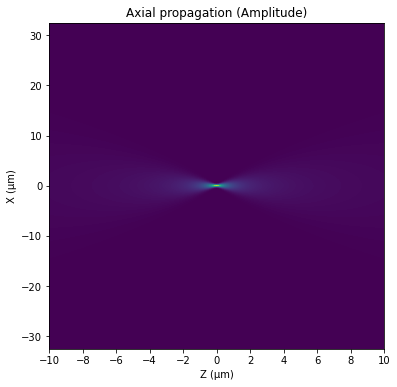

In [67]:
extent = [1e6* z.min(),1e6* z.max(),(-LX/4)*1e6,(LX/4)*1e6]
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_title('Axial propagation (Amplitude)')
ax.set_xlabel('Z (\u03bcm)')
ax.set_ylabel('X (\u03bcm)')
ax.set_xticks(np.arange(-10,10.1,2))
ax.set_yticks(np.arange(-40,40.1,10))
ax.imshow(propzi,aspect='auto',extent = extent)


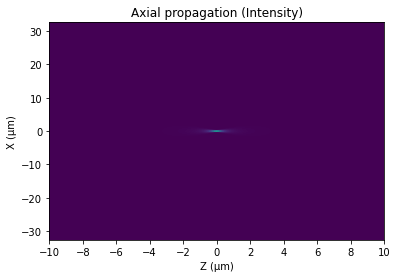

In [68]:
extent = [1e6* z.min(),1e6* z.max(),(-LX/4)*1e6,(LX/4)*1e6]
plt.title('Axial propagation (Intensity)')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('X (\u03bcm)')
plt.xticks(np.arange(-10,10.1,2))
plt.yticks(np.arange(-40,40.1,10))
plt.imshow(propzi**2,aspect='auto',extent = extent)

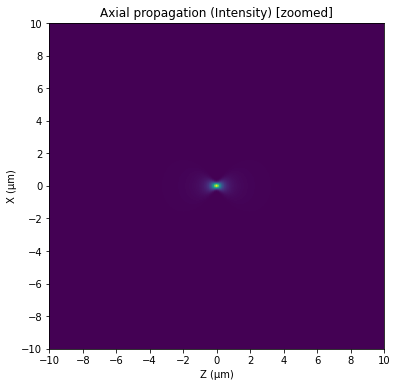

In [69]:
extent = [1e6* z.min(),1e6* z.max(),(-LX/4 + DX*692.5)*1e6,(LX/4 - DX*692)*1e6]
fig, ax = plt.subplots(1, figsize=(6,6))
ax.set_title('Axial propagation (Intensity) [zoomed]')
ax.set_xlabel('Z (\u03bcm)')
ax.set_ylabel('X (\u03bcm)')
ax.set_xticks(np.arange(-10,10.1,2))
ax.set_yticks(np.arange(-10,10.1,2))
ax.imshow(abs(propzi[692:1308]**2),aspect='auto',extent = extent)


In [70]:
LX

0.000130144

In [71]:
DX

3.2536e-08

In [72]:
LX/(4*DX)

1000.0

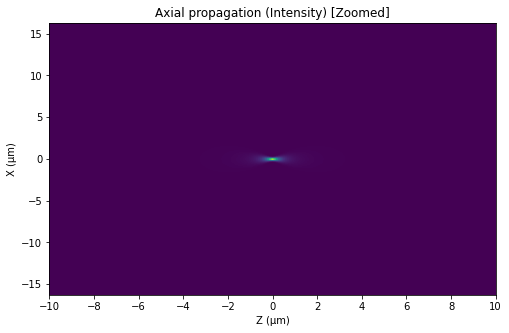

In [73]:
plt.figure(figsize=(8,5))
extent = [1e6* z.min(),1e6* z.max(),(-LX/4 + 500*DX)*1e6,(LX/4 - 500*DX)*1e6]
plt.title('Axial propagation (Intensity) [Zoomed]')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('X (\u03bcm)')
plt.xticks(np.arange(-10,10.1,2))
plt.imshow((propzi**2)[500:1500],aspect='auto',extent = extent)

For circular aperture, we multiply the amplitude with circ function which incoporates the dimensions of the aperture:

In [74]:
ap_power = np.trapz(np.trapz(abs(input_beam**0.5*circ(((X**2 + Y**2)**0.5)/aperture))**2))*dx*dy   #Power loss due to aperture

print('Power across aperture = ' + str(1e3*ap_power) +' mW')

Power across aperture = 0.32594833508322857 mW


In [75]:
circular_ap = circ(((X**2 + Y**2)**0.5)/aperture)
focused_beamf,LX,LY,DX,DY,x2,y2 = fraunhofer(input_beam**0.5*circular_ap,
                                             xlen,ylen,wavelength,focal_dist)

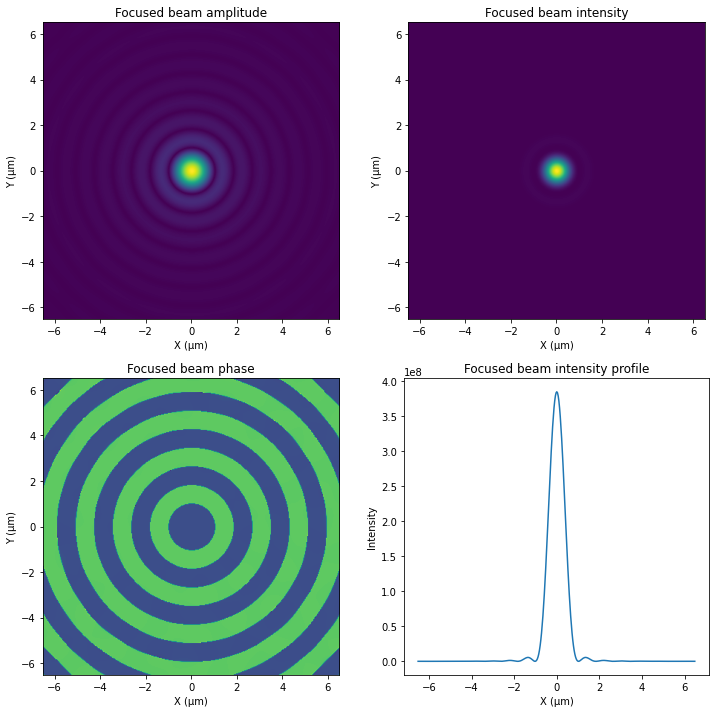

In [76]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][0].set_title('Focused beam amplitude')
ax[0][0].set_xlabel('X (\u03bcm)')
ax[0][0].set_ylabel('Y (\u03bcm)')
ax[0][0].set_xticks(np.arange(-10,11,2))
ax[0][0].set_yticks(np.arange(-10,11,2))
ax[0][0].imshow(abs(focused_beamf)[slicing:N-slicing,slicing:M-slicing],extent = extent)


slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][1].set_title('Focused beam intensity')
ax[0][1].set_xlabel('X (\u03bcm)')
ax[0][1].set_ylabel('Y (\u03bcm)')
ax[0][1].set_xticks(np.arange(-10,11,2))
ax[0][1].set_yticks(np.arange(-10,11,2))
ax[0][1].imshow(abs(focused_beamf**2)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][0].set_title('Focused beam phase')
ax[1][0].set_xlabel('X (\u03bcm)')
ax[1][0].set_ylabel('Y (\u03bcm)')
ax[1][0].set_xticks(np.arange(-10,11,2))
ax[1][0].set_yticks(np.arange(-10,11,2))
ax[1][0].imshow(np.angle(focused_beamf)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1800
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][1].set_title('Focused beam intensity profile')
ax[1][1].set_xlabel('X (\u03bcm)')
ax[1][1].set_ylabel('Intensity')
ax[1][1].set_xticks(np.arange(-10,11,2))
ax[1][1].plot(1e6*x2[slicing:N-slicing],abs(focused_beamf**2)[int(N/2)][slicing:N-slicing])

plt.show()

In [77]:
propz = []
for i in range(len(z)):
    prop = (Propagation(focused_beamf[1000:3000,1000:3000],LX/2,LY/2,wavelength,z[i])) #Propagation of 2000x2000 slice
    propz.append(abs(prop[int(len(prop)/2)]))

propzf = np.transpose(propz) #f for finite aperture

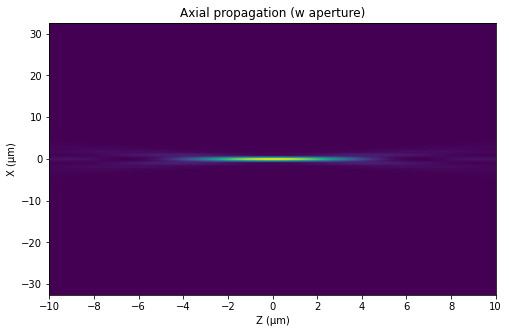

In [78]:
plt.figure(figsize=(8,5))
extent = [1e6* z.min(),1e6* z.max(),(-LX/4)*1e6,(LX/4)*1e6]
plt.title('Axial propagation (w aperture)')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('X (\u03bcm)')
plt.xticks(np.arange(-10,10.1,2))
plt.imshow((propzf**2),aspect='auto',extent = extent)

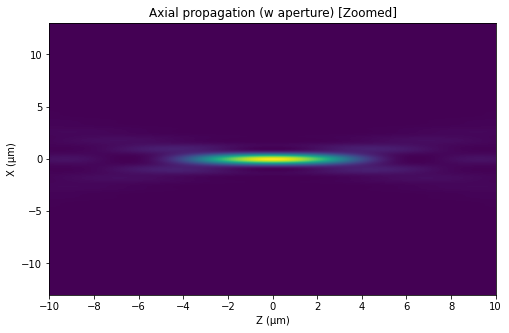

In [79]:
plt.figure(figsize=(8,5))
extent = [1e6* z.min(),1e6* z.max(),(-LX/4 + 600*DX)*1e6,(LX/4 - 600*DX)*1e6]
plt.title('Axial propagation (w aperture) [Zoomed]')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('X (\u03bcm)')
plt.xticks(np.arange(-10,10.1,2))
plt.imshow((propzf**2)[600:1400],aspect='auto',extent = extent)

In [80]:
def spherical(X,Y,aper,RMS):                #Spherical aberration
    r2 = ((X**2 + Y**2)**0.5)/(aper/2)  #Normalized coordinates
    return np.exp(-1j*2*np.pi*(np.sqrt(5)*(6*r2**4 - 6*r2**2 +1))*RMS)    #RMS multiplied

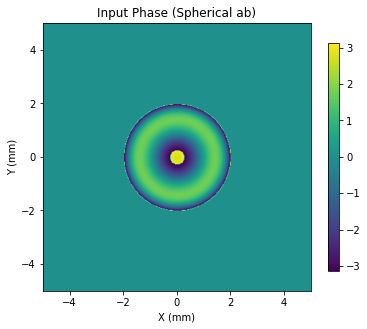

In [81]:
sph_term = spherical(X,Y,aperture,0.25)   #Calculating spherical aberration
sph_term[np.where(circ((X**2 + Y**2)**0.5/aperture)==0)] = 0  #circ function to make outside-aperture angle=0
input_beam_sph = (input_beam**0.5)*sph_term   #Multiplication of aberration with input beam


slicing = 1800
extent = [(xmin + slicing*dx)*1e3, (xmax - slicing*dx)*1e3,(ymin + slicing*dy)*1e3,(ymax - slicing*dy)*1e3]
plt.figure(figsize = (6,6))
plt.title('Input Phase (Spherical ab)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.imshow(np.angle(input_beam_sph)[slicing:N-slicing,slicing:M-slicing],extent = extent)
plt.colorbar(shrink=0.7)


In [82]:
focused_beamsph,LX,LY,DX,DY,x2,y2 = fraunhofer(input_beam_sph*circular_ap,xlen,ylen,wavelength,focal_dist)

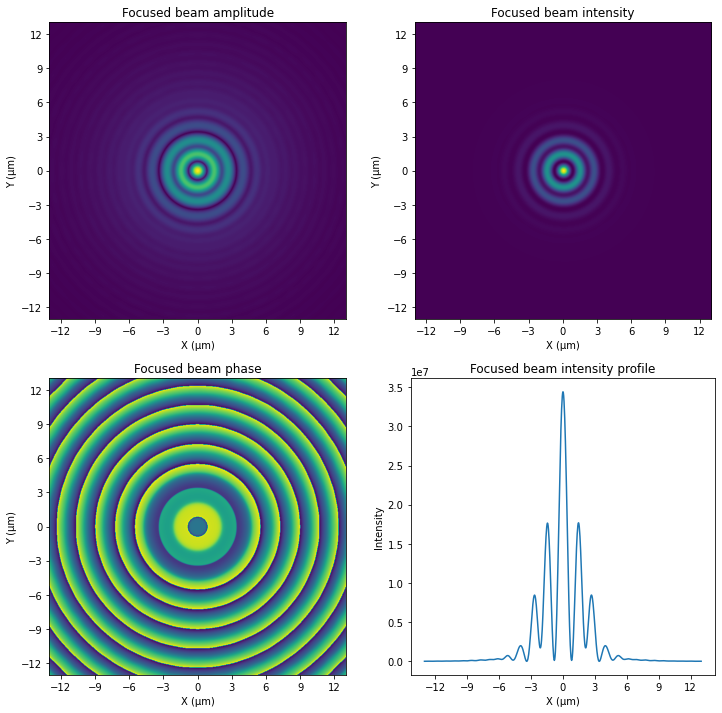

In [83]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

slicing = 1600
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][0].set_title('Focused beam amplitude')
ax[0][0].set_xlabel('X (\u03bcm)')
ax[0][0].set_ylabel('Y (\u03bcm)')
ax[0][0].set_xticks(np.arange(-15,15,3))
ax[0][0].set_yticks(np.arange(-15,15,3))
ax[0][0].imshow(abs(focused_beamsph)[slicing:N-slicing,slicing:M-slicing],extent = extent)


slicing = 1600
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[0][1].set_title('Focused beam intensity')
ax[0][1].set_xlabel('X (\u03bcm)')
ax[0][1].set_ylabel('Y (\u03bcm)')
ax[0][1].set_xticks(np.arange(-15,15,3))
ax[0][1].set_yticks(np.arange(-15,15,3))
ax[0][1].imshow(abs(focused_beamsph**2)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1600
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][0].set_title('Focused beam phase')
ax[1][0].set_xlabel('X (\u03bcm)')
ax[1][0].set_ylabel('Y (\u03bcm)')
ax[1][0].set_xticks(np.arange(-15,15,3))
ax[1][0].set_yticks(np.arange(-15,15,3))
ax[1][0].imshow(np.angle(focused_beamsph)[slicing:N-slicing,slicing:M-slicing],extent = extent)

slicing = 1600
extent = [(-LX/2 + slicing*DX)*1e6, (LX/2 - slicing*DX)*1e6,(-LY/2 + slicing*DY)*1e6,(LY/2 - slicing*DY)*1e6]
ax[1][1].set_title('Focused beam intensity profile')
ax[1][1].set_xlabel('X (\u03bcm)')
ax[1][1].set_ylabel('Intensity')
ax[1][1].set_xticks(np.arange(-15,15,3))
ax[1][1].plot(1e6*x2[slicing:N-slicing],abs(focused_beamsph**2)[int(N/2)][slicing:N-slicing])

plt.show()

In [84]:
z_sph = np.arange(-50e-6,50.1e-6,5e-7)   #Propagation distance -50um to 50um (more than aperture to see the effect)
len(z_sph)      

201

In [85]:
propz = []
for i in range(len(z_sph)):
    prop = (Propagation(focused_beamsph[1000:3000,1000:3000],LX/2,LY/2,wavelength,z_sph[i])) #Propagating only the central region
    propz.append(abs(abs(prop[int(len(prop)/2)])))

propzsph = np.transpose(propz) 

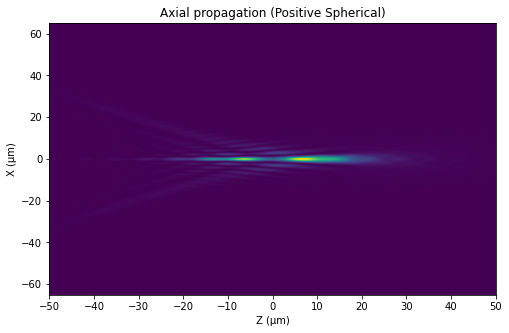

In [86]:
plt.figure(figsize=(8,5))
extent = [1e6* z_sph.min(),1e6* z_sph.max(),(-LX/2)*1e6,(LX/2)*1e6]
plt.title('Axial propagation (Positive Spherical)')
plt.xlabel('Z (\u03bcm)')
plt.ylabel('X (\u03bcm)')
plt.xticks(np.arange(-50,50.1,10))
plt.imshow(propzsph**2,aspect='auto',extent = extent)

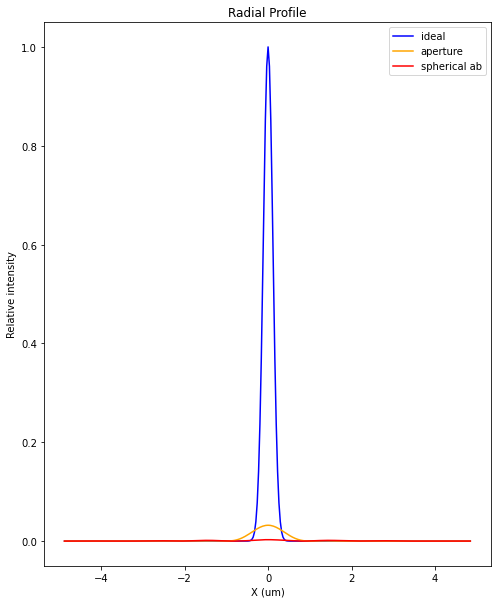

In [87]:
slicing = 1850
plt.figure(figsize=(8,10))
plt.xlabel('X (um)')
plt.ylabel('Relative intensity')
plt.title('Radial Profile')
plt.plot(1e6*x2[slicing:N-slicing],(abs(focused_beam**2)[int(N/2)][slicing:N-slicing])/(abs(focused_beam)**2).max(),label='ideal',color='blue')
plt.plot(1e6*x2[slicing:N-slicing],abs(focused_beamf**2)[int(N/2)][slicing:N-slicing]/(abs(focused_beam)**2).max(),label='aperture',color='orange')
plt.plot(1e6*x2[slicing:N-slicing],abs(focused_beamsph**2)[int(N/2)][slicing:N-slicing]/(abs(focused_beam)**2).max(),label='spherical ab',color='red')
plt.legend()


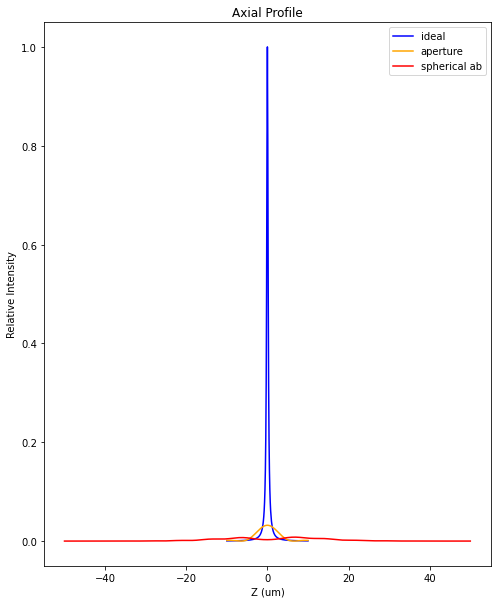

In [88]:
plt.figure(figsize=(8,10))
plt.xlabel('Z (um)')
plt.ylabel('Relative Intensity')
plt.title('Axial Profile')
plt.plot(1e6*z,propzi[int(len(propzi)/2)]**2/(propzi[int(len(propzi)/2)]**2).max(),label='ideal',color='blue')
plt.plot(1e6*z,propzf[int(len(propzf)/2)]**2/(propzi[int(len(propzi)/2)]**2).max(),label='aperture',color='orange')
plt.plot(1e6*z_sph,propzsph[int(len(propzf)/2)]**2/(propzi[int(len(propzi)/2)]**2).max(),label='spherical ab',color='red')
plt.legend()

In [89]:
Z

NameError: name 'Z' is not defined